In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Membuat data sampel untuk klasifikasi
X_class = np.random.rand(1000, 10)
y_class = np.random.randint(2, size=1000)

# Split data menjadi train dan test
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Melatih model klasifikasi
model_class = LogisticRegression()
model_class.fit(X_train_class, y_train_class)

# Prediksi
y_pred_class = model_class.predict(X_test_class)
y_prob_class = model_class.predict_proba(X_test_class)[:, 1]

# Metrik Klasifikasi
print("Accuracy:", accuracy_score(y_test_class, y_pred_class))
print("Precision:", precision_score(y_test_class, y_pred_class))
print("Recall:", recall_score(y_test_class, y_pred_class))
print("F1 Score:", f1_score(y_test_class, y_pred_class))
print("AUC-ROC:", roc_auc_score(y_test_class, y_prob_class))

# Membuat data sampel untuk regresi
X_reg = np.random.rand(1000, 10)
y_reg = 3 * X_reg[:, 0] + 2 * X_reg[:, 1] + np.random.randn(1000) * 0.1

# Split data menjadi train dan test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Melatih model regresi
model_reg = LinearRegression()
model_reg.fit(X_train_reg, y_train_reg)

# Prediksi
y_pred_reg = model_reg.predict(X_test_reg)

# Metrik Regresi
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))


Accuracy: 0.465
Precision: 0.45112781954887216
Recall: 0.6382978723404256
F1 Score: 0.5286343612334802
AUC-ROC: 0.44309514251304694
Mean Absolute Error: 0.07490479301108559
Mean Squared Error: 0.008814207313669857
Root Mean Squared Error: 0.09388400989343104


In [3]:
#k fold cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean Score: 0.9600000000000002


In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Cross-Validation Scores: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
Mean Score: 0.9533333333333335


In [5]:
#### Contoh Implementasi LOOCV
## Berikut adalah contoh implementasi LOOCV menggunakan scikit-learn di Python:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define model
model = RandomForestClassifier()

# Define Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Perform LOOCV
scores = cross_val_score(model, X, y, cv=loo)

print("Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Mean Score: 0.9533333333333334


In [6]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

data = load_iris()
X, y = data.data, data.target

model = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=skf)

print("Stratified Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())


Stratified Cross-Validation Scores: [1.         0.96666667 0.93333333 1.         0.9       ]
Mean Score: 0.9600000000000002


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Binary classification (taking only two classes for simplicity)
X = X[y != 2]
y = y[y != 2]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define model
model = RandomForestClassifier()

# Train model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Confusion Matrix:
 [[17  0]
 [ 0 13]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


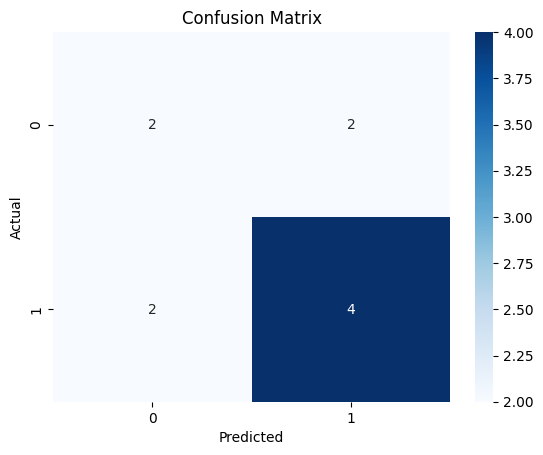

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.67      0.67      0.67         6

    accuracy                           0.60        10
   macro avg       0.58      0.58      0.58        10
weighted avg       0.60      0.60      0.60        10



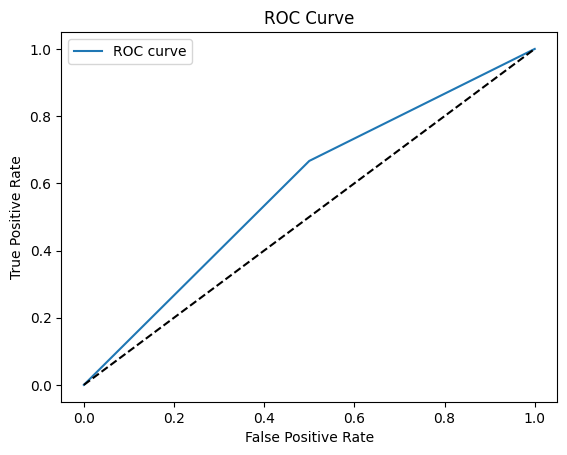

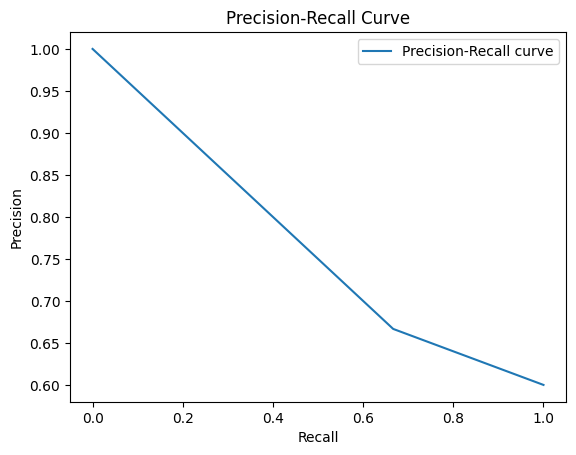

AUC Score: 0.5833333333333333


In [8]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan kita sudah memiliki y_test dan y_pred
y_test = [0, 1, 0, 1, 0, 1, 1, 0, 1, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1, 1, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# AUC Score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)
